In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from math import ceil
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

Part 1

1. Read in Data and report summary statistics (mean + std / frequency) for age, sex, bmi, children, smoker, and charges) by region.

In [129]:
def load_dataset(file_name):
    '''
    Function reads a raw csv file and returns a dataframe
    caution: please keep the csv file in the same folder as this ipynb file
    Parameters:
        file_name (str): Input file name
    '''
    df = pd.read_csv(file_name)
    return df

In [130]:
#call the funtion to read and load insurance.csv file
insurance_df = load_dataset('insurance.csv')

In [131]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180
...,...,...,...,...,...,...,...
999,19,female,28.880,0,yes,northwest,17748.50620
1000,19,male,30.590,0,no,northwest,1639.56310
1001,18,female,30.115,0,no,northeast,21344.84670
1002,32,male,28.880,0,no,northwest,3866.85520


In [132]:
#check for null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [133]:
#check shape for the dataframe
insurance_df.shape

(1004, 7)

In [134]:
#summary statistics

feature = []
mean = []
std = []
frequency = []
Columns = ['Feature', 'Mean', 'Standard Deviation', 'Frequency']
grouped_by_region_mean = insurance_df.groupby(['region']).mean() # groupby region and returns mean of all the numerical variables
grouped_by_region_std = insurance_df.groupby(['region']).std() # groupby region and returns standard deviation fo all the numerical variables
grouped_by_region_sex_frq = insurance_df.groupby(['region','sex'])['sex'].count() # groupby region and sex and return the frequency of each sex
grouped_by_region_smoker_frq = insurance_df.groupby(['region','smoker'])['smoker'].count() # groupby region and smoker and return frequency of smokers and non smokers

In [135]:
print('Mean of numerical variables by region')
grouped_by_region_mean

Mean of numerical variables by region


,age,bmi,children,charges
region,,,,
northeast,38.831111,29.408622,1.048889,13387.630722
northwest,39.391129,29.241996,1.185484,12609.897092
southeast,38.942029,33.400942,1.010870,14952.589649
southwest,40.000000,30.693725,1.176471,12530.708516


In [136]:
print('Standard Deviation of numerical variables by region')
grouped_by_region_std

Standard Deviation of numerical variables by region


,age,bmi,children,charges
region,,,,
northeast,13.851183,6.094427,1.184841,11126.065887
northwest,13.858314,5.193813,1.186066,11329.232371
southeast,14.150499,6.690431,1.126487,13933.801606
southwest,14.044081,5.702855,1.272141,11592.095327


In [137]:
print('Frequency of male and females by Region')
grouped_by_region_sex_frq

Frequency of male and females by Region


region     sex   
northeast  female    114
           male      111
northwest  female    127
           male      121
southeast  female    130
           male      146
southwest  female    125
           male      130
Name: sex, dtype: int64

In [138]:
print('Frequency of smokers and non-smokers by Region')
grouped_by_region_smoker_frq

Frequency of smokers and non-smokers by Region


region     smoker
northeast  no        179
           yes        46
northwest  no        201
           yes        47
southeast  no        202
           yes        74
southwest  no        209
           yes        46
Name: smoker, dtype: int64

2. How would you characterize this population? Use figures/tables to support you answer

In [139]:
insurance_df.describe()

,age,bmi,children,charges
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,39.296813,30.791350,1.104582,13408.084468
std,13.971469,6.192375,1.193209,12145.987036
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4775.283975
50%,39.000000,30.495000,1.000000,9440.087825
75%,51.000000,34.816250,2.000000,17178.892300
max,64.000000,53.130000,5.000000,63770.428010


In [140]:
# plot for visualizing the distribution of our inputs
def plot_distribution(inp,label):
    '''
    Function takes an array and returns a data distribution plot
    Parameters:
        inp (arr): Input array
        label (string): label to give in title of the plot
    ''' 
    rcParams['figure.figsize'] = 20,10
    rcParams['font.size'] = 30
    sns.set
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp),color='k',linestyle='dashed',linewidth = 5)
    _,max_ = plt.ylim()
    plt.text(inp.mean() + inp.mean()/10,max_ - max_/10,'Mean {:.2f}'.format(inp.mean()),)
    plt.title(f'Data distribution: {label}')
    plt.figure()

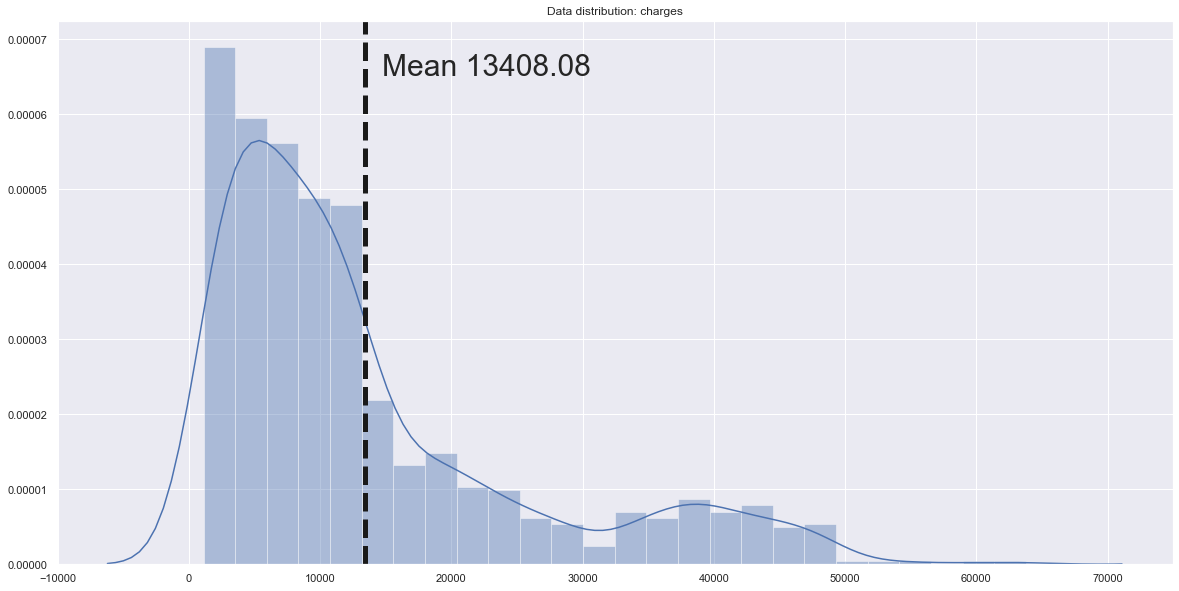

<Figure size 1440x720 with 0 Axes>

In [141]:
arr_charges = np.array(insurance_df['charges'].to_list())
plot_distribution(arr_charges,'charges')

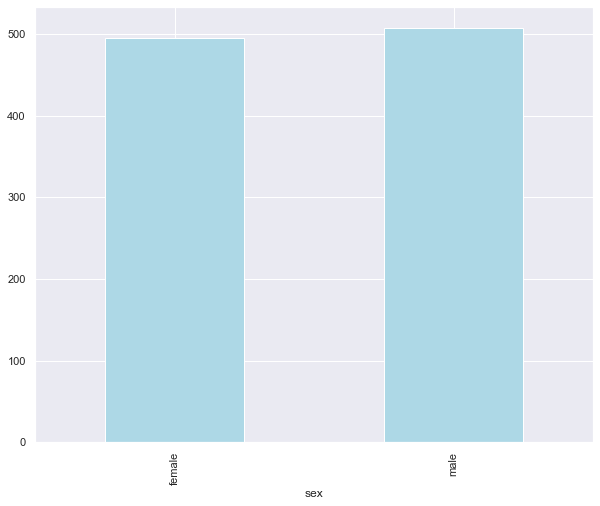

In [142]:
#plot number of females and males in the dataset
plt.figure(figsize=(10,8))
groupby_sex = insurance_df.groupby('sex')
groupby_sex.size().plot(kind = 'bar',color = 'lightblue')

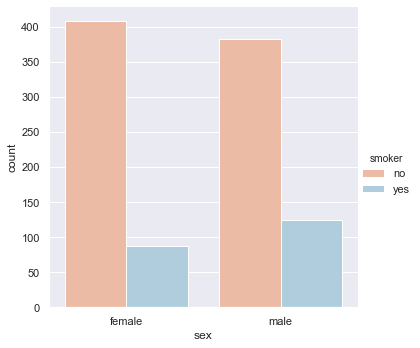

In [143]:
#plot to see number of male and female smokers.
sns.set(rc={'figure.figsize':(15,12)})
sns.catplot(x="sex", kind="count",hue = 'smoker', palette = 'RdBu', data=insurance_df)

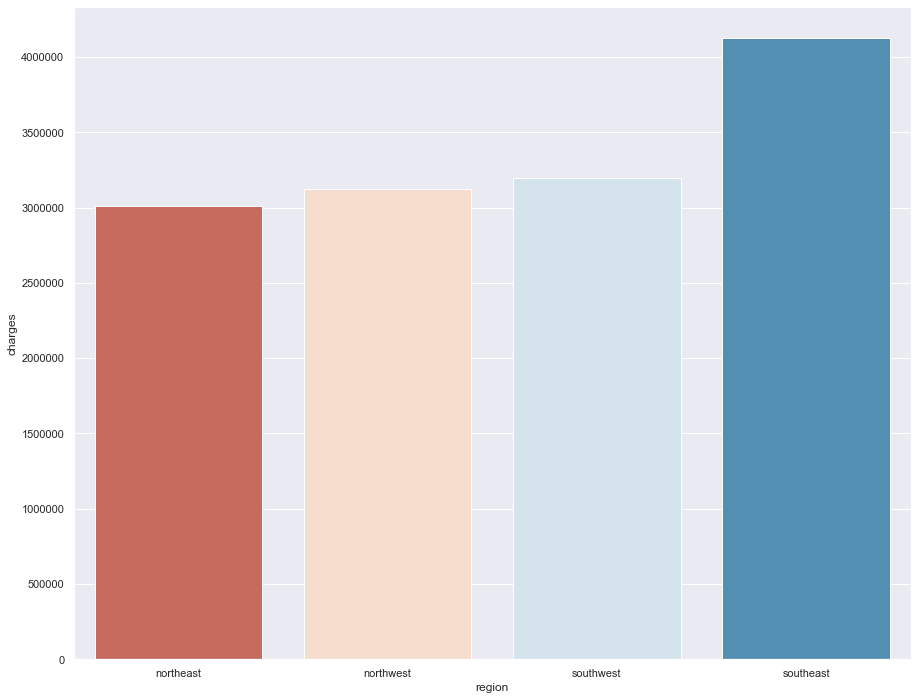

In [144]:
groupby_region_charges = insurance_df.groupby('region')['charges'].sum()
groupby_region_charges = groupby_region_charges.to_frame().reset_index()
groupby_region_charges
groupby_region_charges = groupby_region_charges.sort_values(['charges'])
sns.barplot(groupby_region_charges['region'], groupby_region_charges['charges'], palette='RdBu')

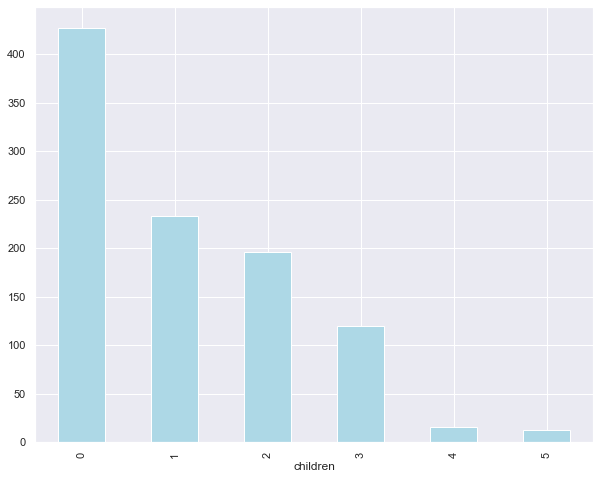

In [145]:
#plot number of children in the dataset
plt.figure(figsize=(10,8))
groupby_children = insurance_df.groupby('children')
groupby_children.size().plot(kind = 'bar',color = 'lightblue')

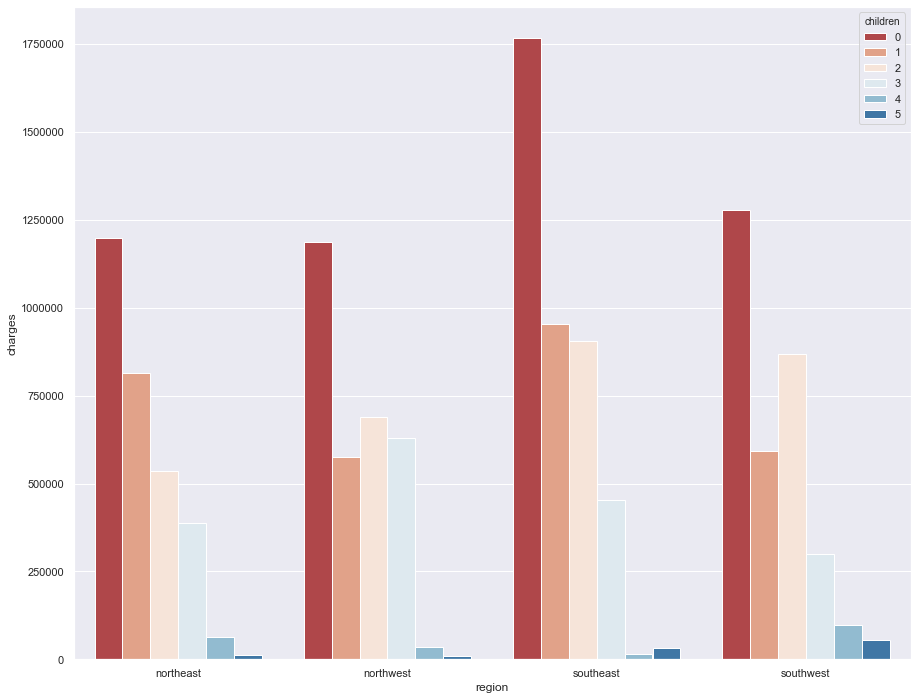

In [146]:
groupby_region_children_charges = insurance_df.groupby(['region','children'])['charges'].sum()

groupby_region_children_charges = groupby_region_children_charges.to_frame().reset_index()
groupby_region_children_charges
##groupby_region_children_charges
#groupby_region_children_charges = groupby_region_charges.sort_values(['charges'])
sns.barplot(groupby_region_children_charges['region'], groupby_region_children_charges['charges'],palette='RdBu',hue= groupby_region_children_charges['children'])



#region wise plot to see how number of chidren affect medical cost
#plt.figure(figsize=(15,10))
#sns.barplot(x = 'region',y = 'charges',ci=False, hue = 'children', palette = 'RdBu', data = insurance_df)
#plt.legend(loc='upper right')
#plt.show

3. In this sample, is female age different from male age?

In [147]:
#groupby using sen variable and calculate the mean age
gender_age_mean_df = insurance_df.groupby('sex', as_index=False)['age'].mean()# groupby gender and calculate mean of their age.
gender_age_mean_df

,sex,age
0,female,40.004032
1,male,38.606299


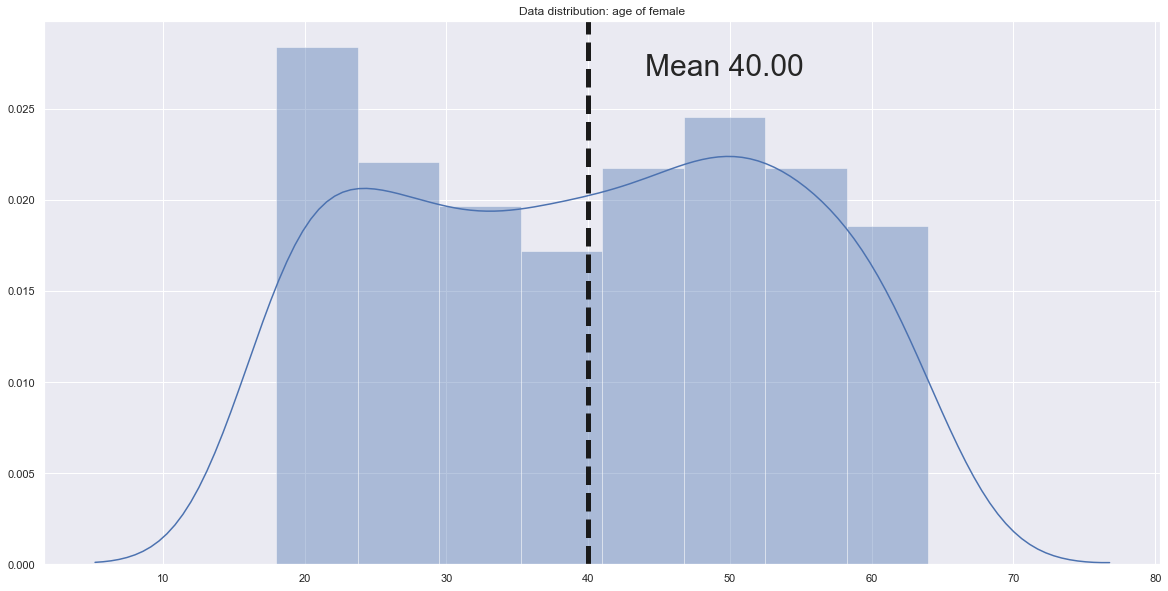

<Figure size 1440x720 with 0 Axes>

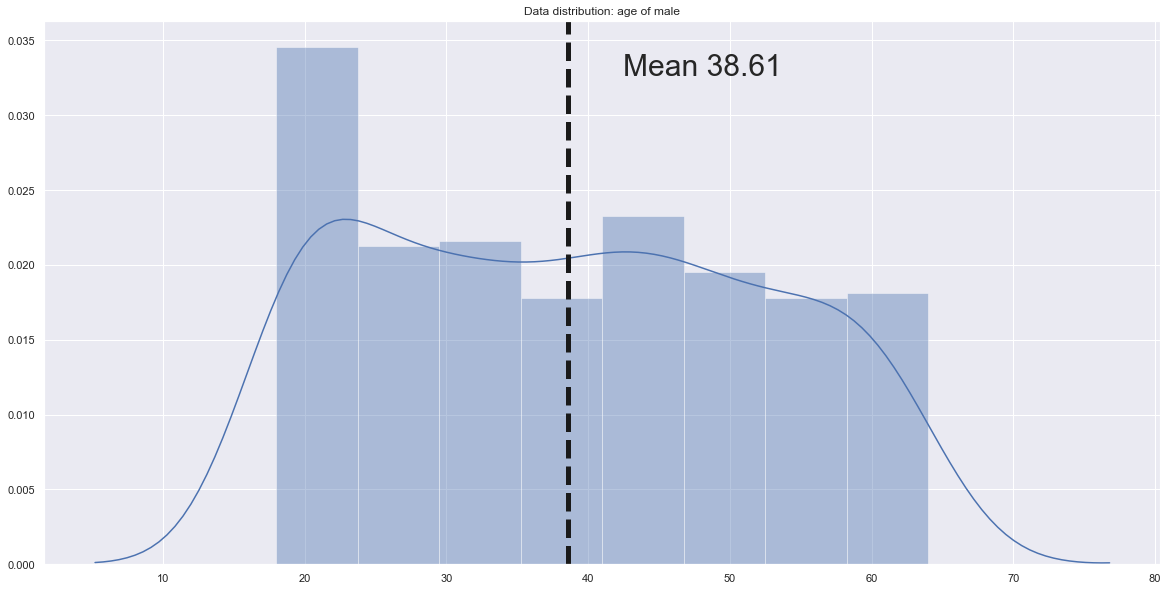

<Figure size 1440x720 with 0 Axes>

In [149]:
arr_f_age = np.array(insurance_df.loc[insurance_df['sex'] == 'female', 'age'].to_list()) #array of value column when gender column = 0
arr_m_age = np.array(insurance_df.loc[insurance_df['sex'] == 'male', 'age'].to_list()) #array of value column when gender column = 1
plot_distribution(arr_f_age,'age of female') # for visualizing data distribution of arr_f
plot_distribution(arr_m_age,'age of male') #for visualizing data distribution of arr_m

In [151]:
def qq_plot(inp,label):
    '''
    Function takes an array and returns a qqplot plot to check if the data is normally distributed
    Parameters:
        inp (arr): Input array
        label (string): label to give in title of the plot
    '''
    qqplot(inp, line ='s')
    plt.title(f'qqplot: {label}')
    plt.show()

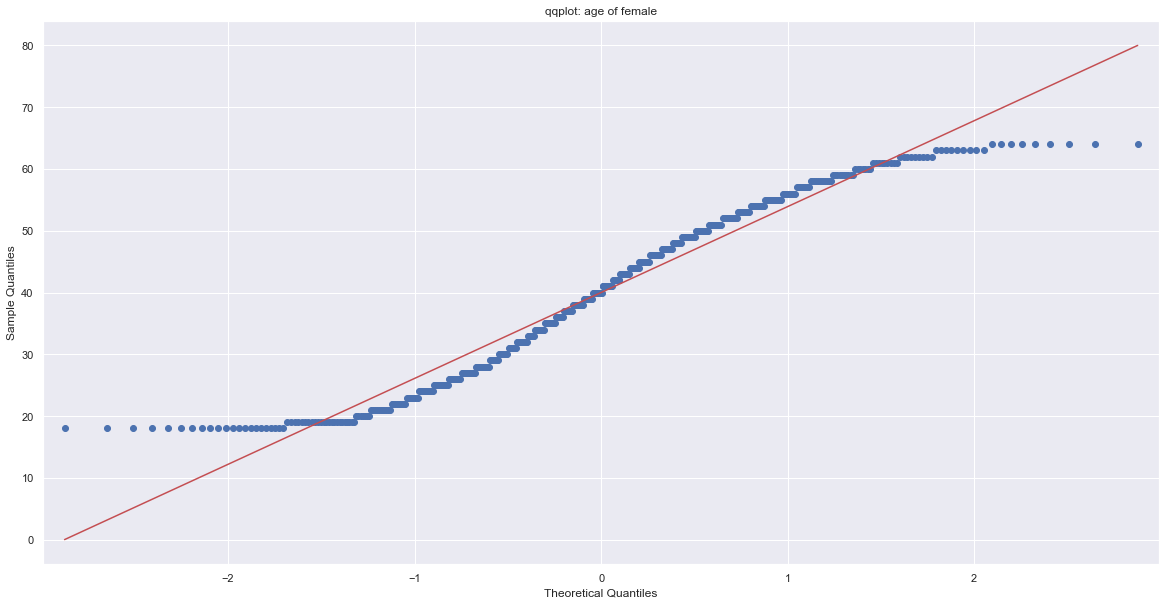

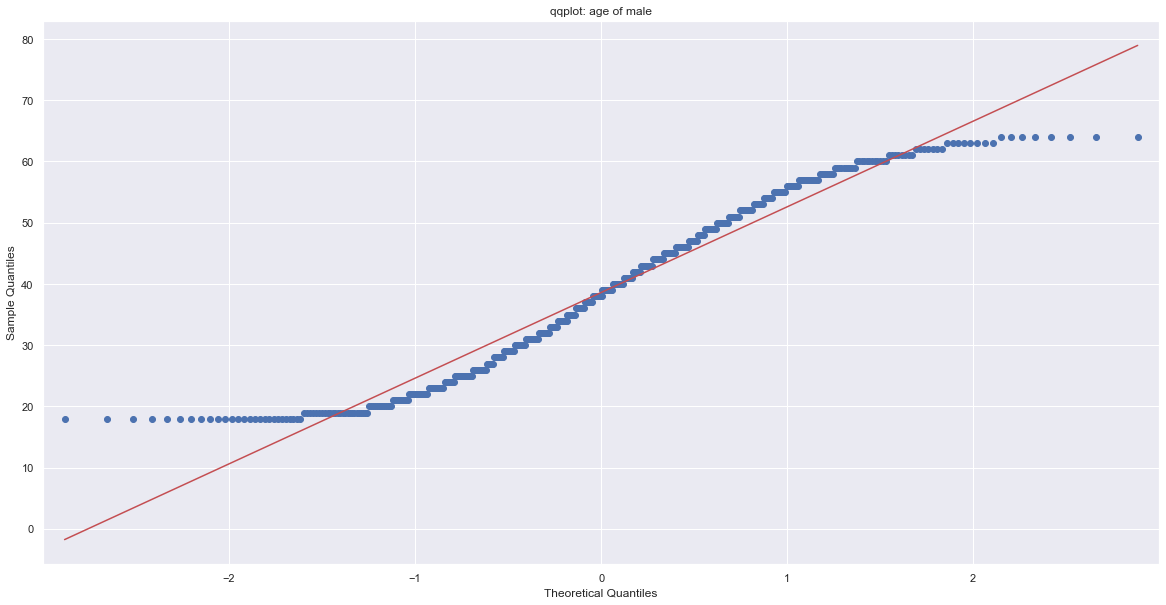

In [152]:
qq_plot(arr_f_age,'age of female')
qq_plot(arr_m_age,'age of male')

In [153]:
def Mann_Whitney_U_test(dist_1,dist_2): #Mann Whitney U test is a non parametric test for non normal distribution
    '''
    Function takes two arrays and returns a p value using Mann Whitney U test
    Parameters:
        dist1 (arr), dist2 (arr): Input arrays
    '''
    stat,p = mannwhitneyu(dist_1, dist_2)
    return p

In [154]:
p = Mann_Whitney_U_test(arr_f_age,arr_m_age)
if p > 0.05:
    print(f'p value is:',p)
    print('Female age is not statistically different than male age (fail to reject H0)')
else:
    print(f'p value is:',p)
    print('Female age is Statistically different than male age (reject H0)')

p value is: 0.055410558829852456
Female age is not statistically different than male age (fail to reject H0)


4. Is there a difference in smoking rates between those who have kids and those who do not?

In [155]:
insurance_pp_df = insurance_df.copy()
insurance_pp_df['children_yes_no'] = np.where(insurance_pp_df['children']>= 1, 'yes', 'no') # creates new column containing yes, if children >= 1 and 0 if children = 0
insurance_pp_df['smoker_1_0'] = np.where(insurance_pp_df['smoker'] == 'yes',1,0) # creates new column containing 1 if smoker = yes and 0 if smoker = no 

In [156]:
insurance_pp_df

,age,sex,bmi,children,smoker,region,charges,children_yes_no,smoker_1_0
0,45,female,25.175,2,no,northeast,9095.06825,yes,0
1,36,female,30.020,0,no,northwest,5272.17580,no,0
2,64,female,26.885,0,yes,northwest,29330.98315,no,1
3,46,male,25.745,3,no,northwest,9301.89355,yes,0
4,19,male,31.920,0,yes,northwest,33750.29180,no,1
...,...,...,...,...,...,...,...,...,...
999,19,female,28.880,0,yes,northwest,17748.50620,no,1
1000,19,male,30.590,0,no,northwest,1639.56310,no,0
1001,18,female,30.115,0,no,northeast,21344.84670,no,0
1002,32,male,28.880,0,no,northwest,3866.85520,no,0


In [157]:
contingency_table = pd.crosstab(insurance_pp_df['smoker'],insurance_pp_df['children_yes_no']) #Contingency Table
contingency_table

children_yes_no,no,yes
smoker,,
no,335,456
yes,92,121


In [158]:
proportion_table = pd.crosstab(insurance_pp_df['smoker'],insurance_pp_df['children_yes_no']).apply(lambda r:r/r.sum(),axis=0) # proportion table
proportion_table

children_yes_no,no,yes
smoker,,
no,0.784543,0.790295
yes,0.215457,0.209705


In [159]:
control_child = insurance_pp_df[insurance_pp_df['children_yes_no'] == 'yes']['smoker_1_0'] # control group contains smoker values of all the people who who have children
treatment_child = insurance_pp_df[insurance_pp_df['children_yes_no'] == 'no']['smoker_1_0'] # treatment group contains smoker values of all the people who who have children
def two_proportion_ztest(control,treatment):
    '''
    Function takes two series object and returns a p value using 2 propertion z test
    Parameters:
        control (series), treatment (series): Input series
    '''
    n_control = control.count() # number of people in control group
    n_treatment = treatment.count() # number of people in treatment group
    total = [n_control, n_treatment] # total number of people in control and treatment group
    converted = [control.sum(), treatment.sum()] # number of people who converted in control and treatment group
    z_stat, p = proportions_ztest(converted, nobs=total) #calculating z_stat and p values
    return p

In [160]:
p = two_proportion_ztest(control_child,treatment_child)
if p > 0.05:
    print(f'p value is:',p)
    print('There is no statistical difference in smoking rates between the 2 groups (fail to reject H0)')
else:
    print(f'p value is:',p)
    print('There is a statistical difference in smoking rates between the 2 groups (reject H0)')

p value is: 0.8255812897570953
There is no statistical difference in smoking rates between the 2 groups (fail to reject H0)


In [161]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180
...,...,...,...,...,...,...,...
999,19,female,28.880,0,yes,northwest,17748.50620
1000,19,male,30.590,0,no,northwest,1639.56310
1001,18,female,30.115,0,no,northeast,21344.84670
1002,32,male,28.880,0,no,northwest,3866.85520


5. Are there any instances of high collinearity in this data-set?

In [162]:
OneHotEncoded_insurance_df = pd.get_dummies(insurance_df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
OneHotEncoded_insurance_df = OneHotEncoded_insurance_df.drop(['charges'],axis=1)
OneHotEncoded_insurance_df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,45,25.175,2,0,0,0,0,0
1,36,30.020,0,0,0,1,0,0
2,64,26.885,0,0,1,1,0,0
3,46,25.745,3,1,0,1,0,0
4,19,31.920,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
999,19,28.880,0,0,1,1,0,0
1000,19,30.590,0,1,0,1,0,0
1001,18,30.115,0,0,0,0,0,0
1002,32,28.880,0,1,0,1,0,0


In [163]:
def VIF(dataframe):
    vif = pd.DataFrame()
    vif['features'] = dataframe.columns
    vif["VIF_val"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif
VIF(OneHotEncoded_insurance_df.iloc[:,:])

,features,VIF_val
0,age,7.882973
1,bmi,11.541357
2,children,1.844473
3,sex_male,2.018957
4,smoker_yes,1.274951
5,region_northwest,1.967180
6,region_southeast,2.349389
7,region_southwest,2.074868


6(a). A coworker wants to know whether being male affects medical cost

In [164]:
def boxplot(x_var,y_var,dataframe):
    '''
    Function takes two series object and returns a p value using 2 propertion z test
    Parameters:
        x_var (series), y_var (series): Input series
        dataframe: Dataframe 
    '''
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x=x_var, y=y_var, data=dataframe)

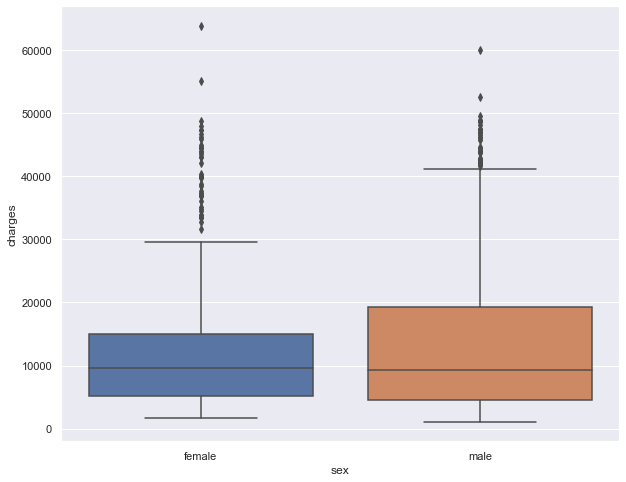

In [165]:
boxplot('sex','charges',insurance_df)

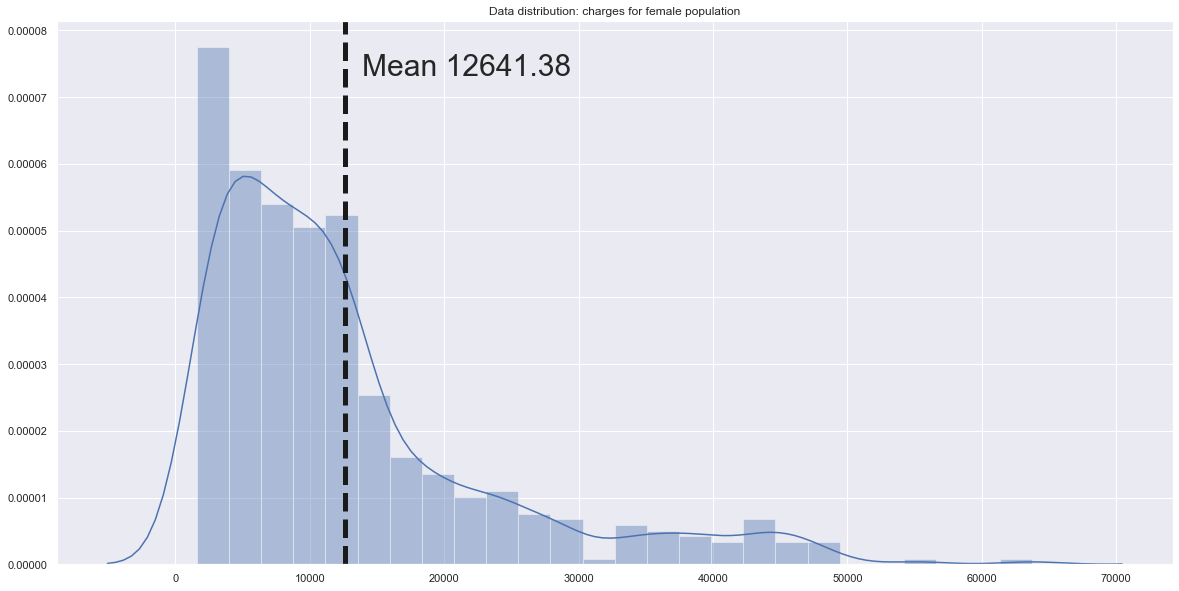

<Figure size 1440x720 with 0 Axes>

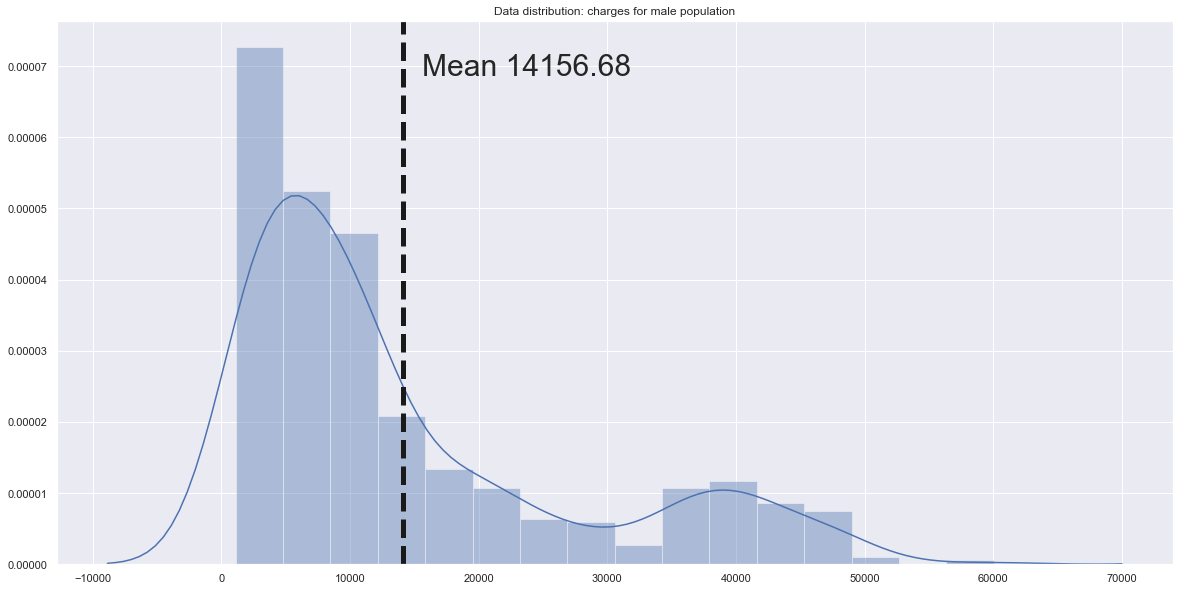

<Figure size 1440x720 with 0 Axes>

In [166]:
arr_f_charges = np.array(insurance_df.loc[insurance_df['sex'] == 'female', 'charges'].to_list()) #array of value column when gender column = 0
arr_m_charges = np.array(insurance_df.loc[insurance_df['sex'] == 'male', 'charges'].to_list()) #array of value column when gender column = 1
plot_distribution(arr_f_charges,'charges for female population') # for visualizing data distribution of arr_f
plot_distribution(arr_m_charges,'charges for male population') #for visualizing data distribution of arr_m

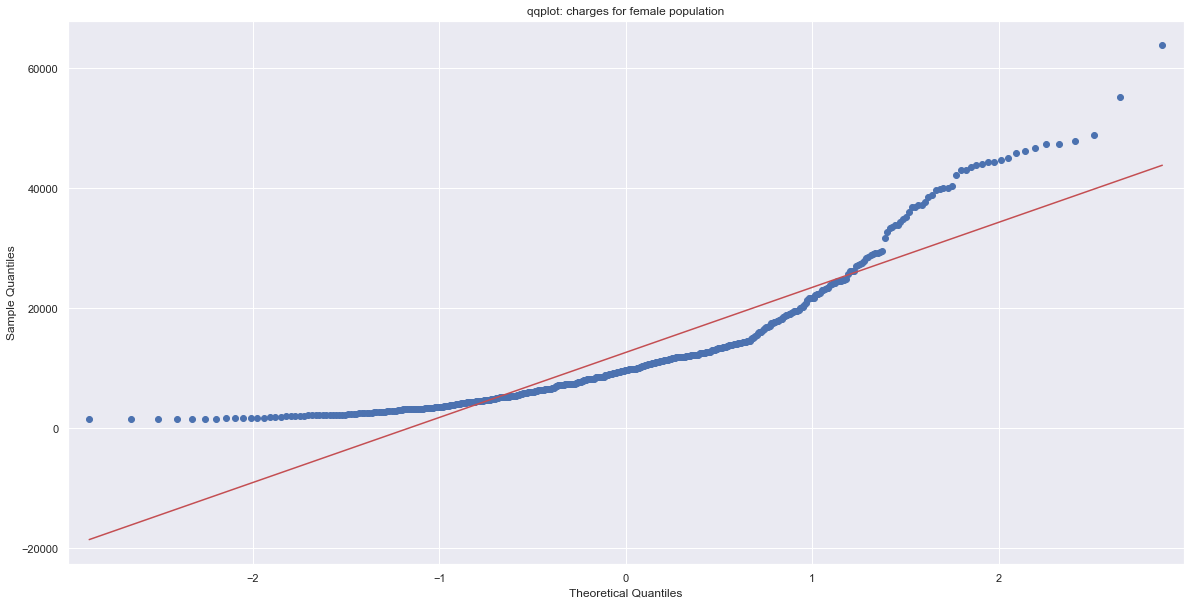

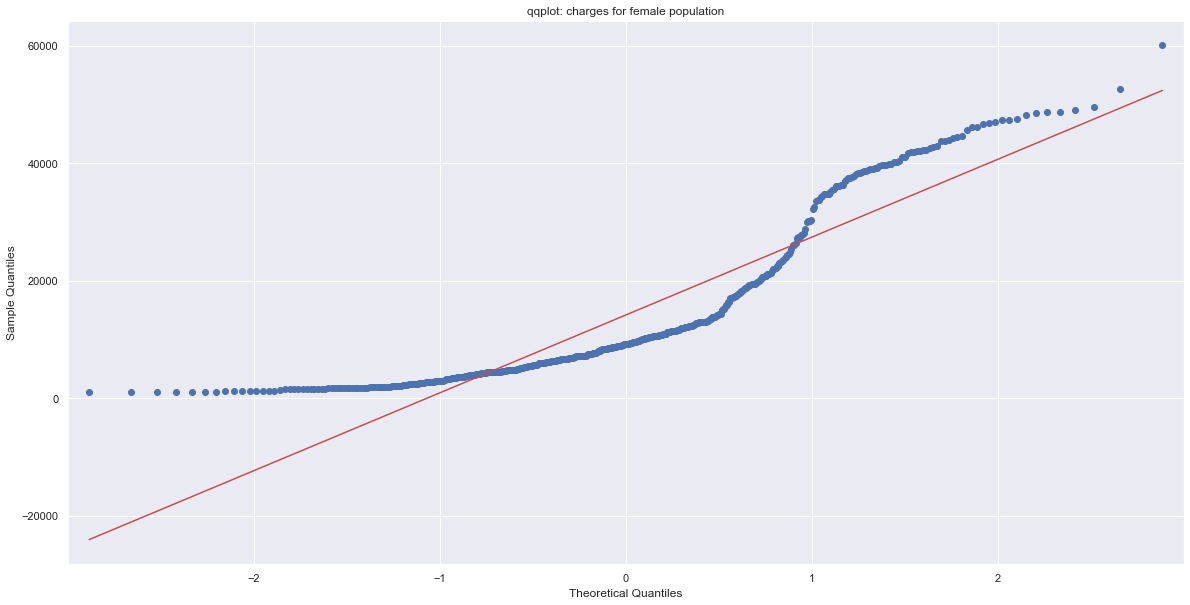

In [167]:
qq_plot(arr_f_charges,'charges for female population')
qq_plot(arr_m_charges,'charges for female population')

In [168]:
p = Mann_Whitney_U_test(arr_f_charges,arr_m_charges) 
if p > 0.05:
    print(f'p value is:',p)
    print('Being male does not affect medical cost (fail to reject H0)')
else:
    print(f'p value is:',p)
    print('Being male affects medical cost (reject H0)')

p value is: 0.45032345291003584
Being male does not affect medical cost (fail to reject H0)


6(b). A coworker wants to know whether being a smoker affects medical cost 

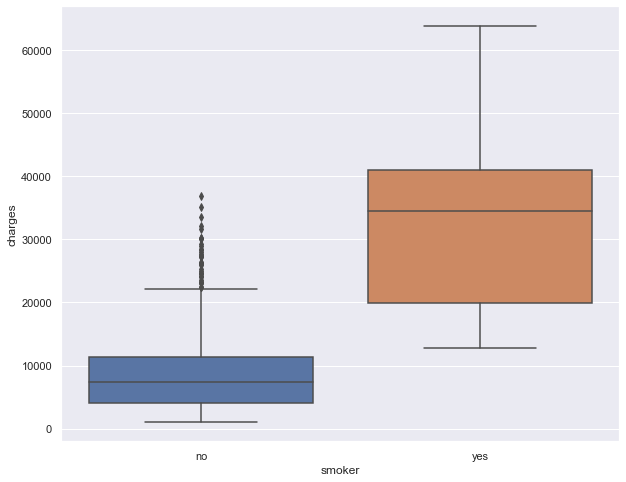

In [169]:
boxplot('smoker','charges',insurance_df)

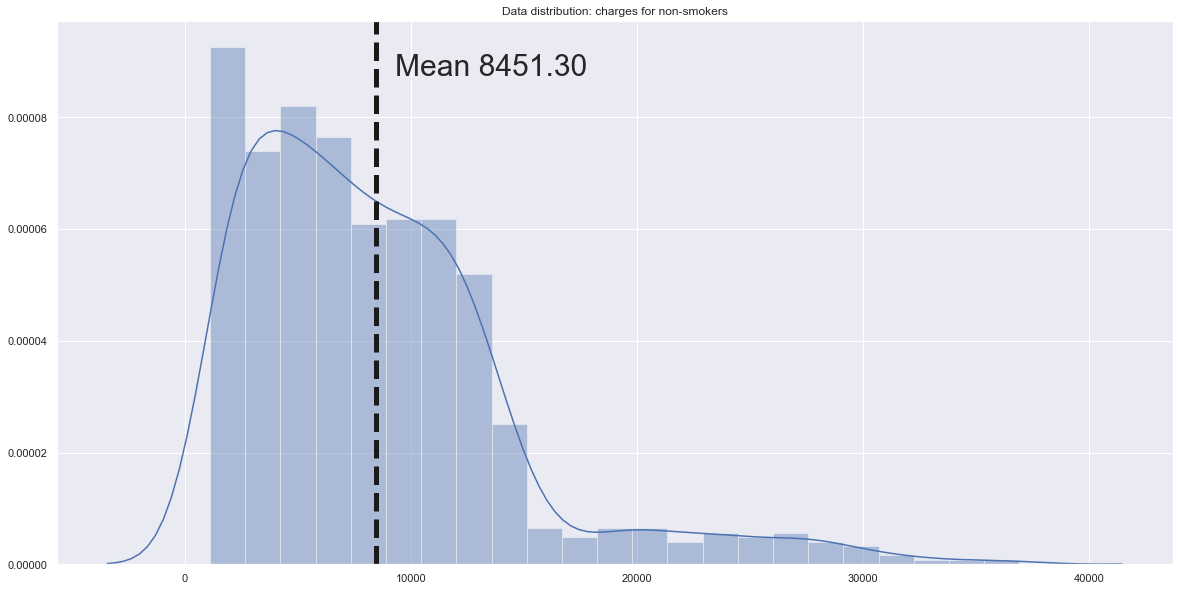

<Figure size 1440x720 with 0 Axes>

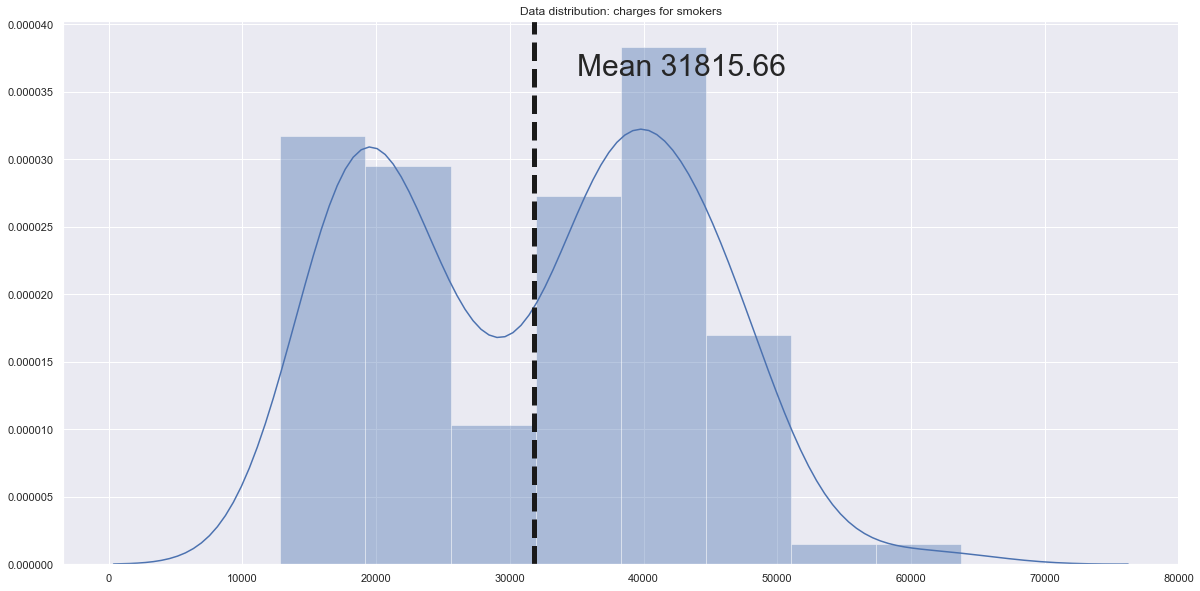

<Figure size 1440x720 with 0 Axes>

In [170]:
arr_ns_charges = np.array(insurance_df.loc[insurance_df['smoker'] == 'no', 'charges'].to_list()) #array of value column when gender column = 0
arr_s_charges = np.array(insurance_df.loc[insurance_df['smoker'] == 'yes', 'charges'].to_list()) #array of value column when gender column = 1
plot_distribution(arr_ns_charges,'charges for non-smokers') # for visualizing data distribution of arr_f
plot_distribution(arr_s_charges,'charges for smokers') #for visualizing data distribution of arr_m

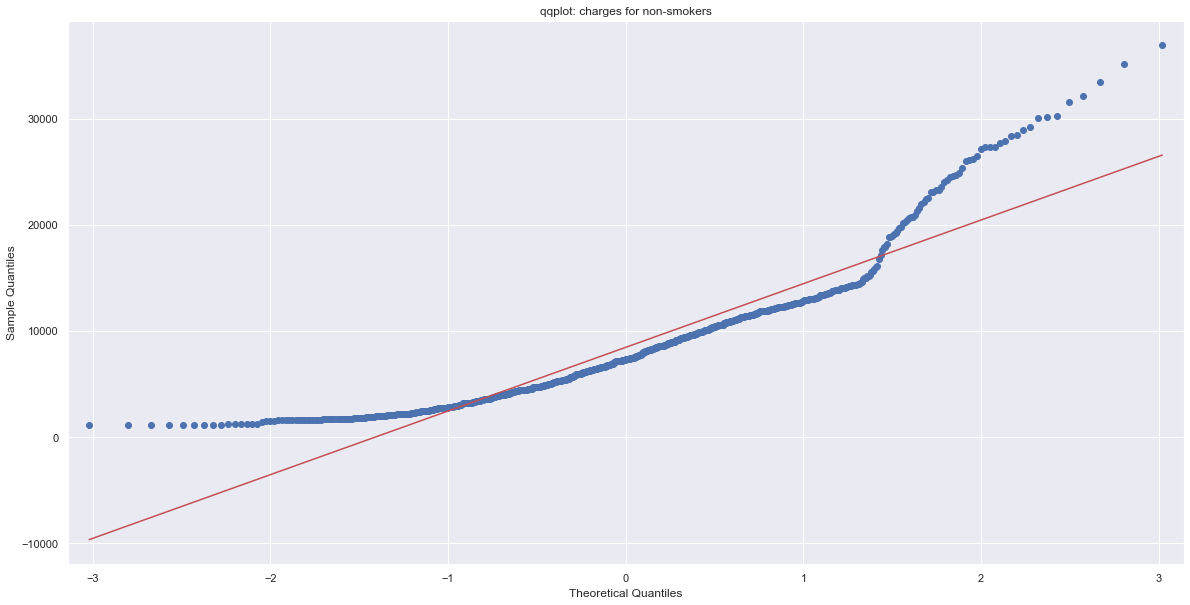

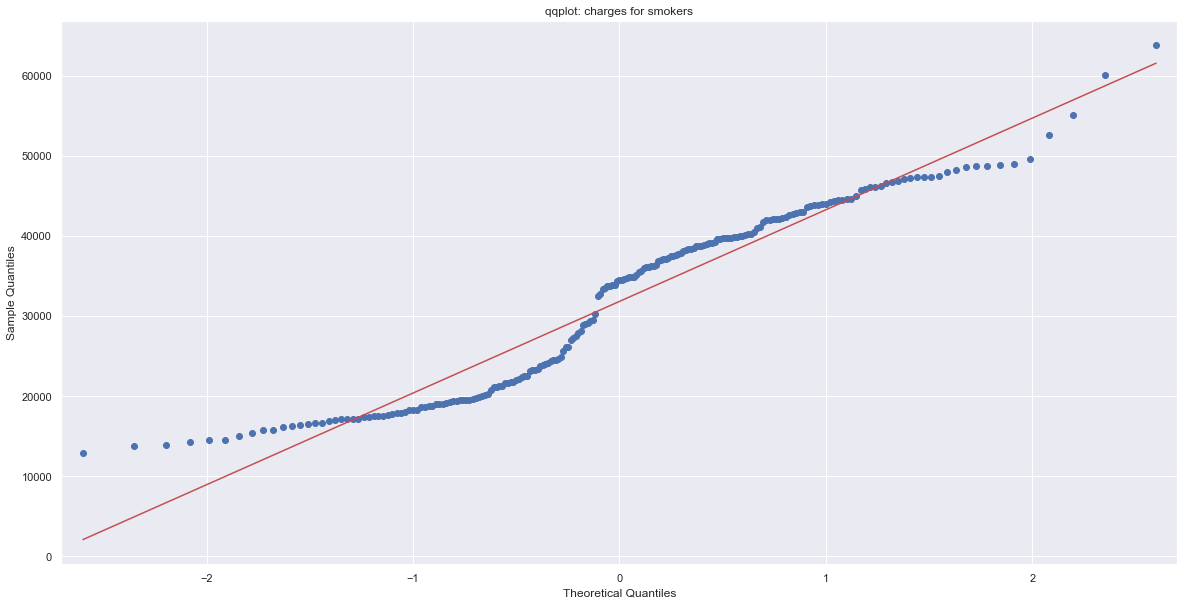

In [171]:
qq_plot(arr_ns_charges, 'charges for non-smokers')
qq_plot(arr_s_charges, 'charges for smokers')

In [172]:
p = Mann_Whitney_U_test(arr_ns_charges,arr_s_charges)
if p > 0.05:
    print(f'p value is:',p)
    print('Being a smoker does not affect medical cost (fail to reject H0)')
else:
    print(f'p value is:',p)
    print('Being a smoker affects medical cost (reject H0)')

p value is: 2.1914033570908758e-100
Being a smoker affects medical cost (reject H0)


6(c). A coworker wants to know what is the effect of each additional year on medical cost

In [173]:
#Linear regression
X = insurance_df.iloc[:,0].values.reshape(-1,1)
y = insurance_df.iloc[:,6].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

LR = LinearRegression().fit(X_train,y_train)

y_pred = LR.predict(X_test)
print(f'R-squared value:', LR.score(X_test,y_test))
print(f'coefficient of age varibale for our linear regression model:',LR.coef_)

R-squared value: 0.0872091641305458
coefficient of age varibale for our linear regression model: [270.45159659]


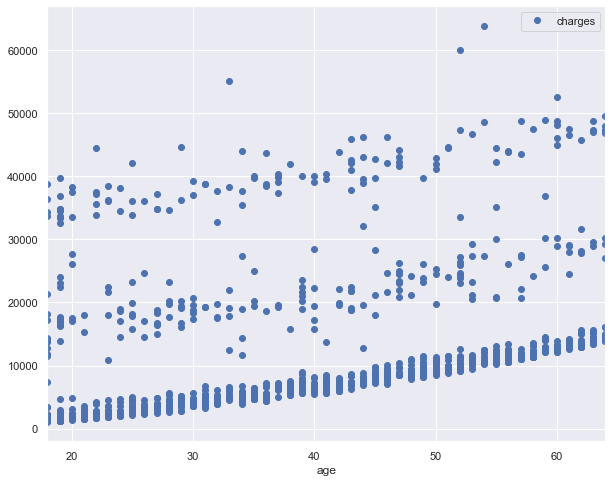

In [174]:
insurance_df.plot(x='age', y='charges', style='o',figsize = (10,8))
plt.show()

7. Your boss comes to you and says we want to limit patients that may cost more than 50K. You don't need to write code to do this, but outline how you could create a model that would take a new patient's characteristics and output the probability that their medical charges would be over 50K.

Q) How would you evaluate the effectiveness of your model?

Once your boss gets your model, he/she sees that your model outputs probabilities. He/She then asks you what probability cut-off should we use to exclude patients (ie if prob is above X, we exclude them. Tell us what X should be)

In [175]:
insurance_df['charges_above_50k'] = np.where(insurance_df['charges']>= 50000, 1, 0)
insurance_df.shape

(1004, 8)

In [176]:
insurance_df[insurance_df['charges_above_50k'] == 1]

,age,sex,bmi,children,smoker,region,charges,charges_above_50k
266,54,female,47.410,0,yes,southeast,63770.42801,1
563,60,male,32.800,0,yes,southwest,52590.82939,1
839,52,male,34.485,3,yes,northwest,60021.39897,1
990,33,female,35.530,0,yes,northwest,55135.40209,1


In [177]:
insurance_df['charges_above_50k'].value_counts()

0    1000
1       4
Name: charges_above_50k, dtype: int64

Part2

In [178]:
conversion_rate_df = load_dataset('conversion_rates.csv')
conversion_rate_df

,date,male,age,has_insurance,came_from,reached_end
0,2018-09-03,1,32,0,Insurance Site B,1
1,2018-09-07,1,35,0,Insurance Site A,0
2,2018-09-05,1,34,0,Insurance Site C,1
3,2018-09-03,1,32,0,Insurance Site C,1
4,2018-09-05,1,31,0,Google Search,0
...,...,...,...,...,...,...
275,2018-09-02,1,31,1,Insurance Site B,1
276,2018-09-08,0,31,1,Insurance Site A,0
277,2018-09-07,0,30,1,Insurance Site A,1
278,2018-09-06,0,38,1,Insurance Site B,1


In [179]:
def preprocessing_cr(dataframe):
    '''
    Function takes dataframe preprocesses the data and return the preprocessed dataframe
    '''   
    dataframe['date'] = pd.to_datetime(dataframe['date'])#converting date column to datetime
    dataframe['group'] = np.where(dataframe.date.dt.day < 5,'before product change','after product change') #creating a new column, group
    return dataframe

In [180]:
conversion_rate_df.isnull().sum()

date             0
male             0
age              0
has_insurance    0
came_from        0
reached_end      0
dtype: int64

In [181]:
conversion_rate_df.shape

(280, 6)

In [182]:
conversion_rate_df['date'].value_counts()

2018-09-02    52
2018-09-04    44
2018-09-07    41
2018-09-05    41
2018-09-08    38
2018-09-03    37
2018-09-06    27
Name: date, dtype: int64

In [183]:
conversion_rate_pp_df = preprocessing_cr(conversion_rate_df)
conversion_rate_pp_df

,date,male,age,has_insurance,came_from,reached_end,group
0,2018-09-03,1,32,0,Insurance Site B,1,before product change
1,2018-09-07,1,35,0,Insurance Site A,0,after product change
2,2018-09-05,1,34,0,Insurance Site C,1,after product change
3,2018-09-03,1,32,0,Insurance Site C,1,before product change
4,2018-09-05,1,31,0,Google Search,0,after product change
...,...,...,...,...,...,...,...
275,2018-09-02,1,31,1,Insurance Site B,1,before product change
276,2018-09-08,0,31,1,Insurance Site A,0,after product change
277,2018-09-07,0,30,1,Insurance Site A,1,after product change
278,2018-09-06,0,38,1,Insurance Site B,1,after product change


In [184]:
conversion_rate_pp_df.group.value_counts()

after product change     147
before product change    133
Name: group, dtype: int64

In [185]:
def Conversion_Rate(dataframe):
    '''
    Function takes a dataframe and returns conversion rate grouped by group column
    '''
    conversion_rate = dataframe.groupby('group')['reached_end'] # group by group column and return reached_end column
    conversion_rate = conversion_rate.agg(np.mean)
    return conversion_rate

In [186]:
conversion_rate = Conversion_Rate(conversion_rate_pp_df)
conversion_rate

group
after product change     0.578231
before product change    0.338346
Name: reached_end, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

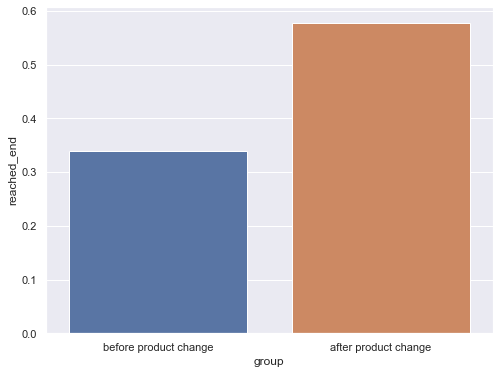

In [187]:
#plot conversion rates before and after product change
plt.figure(figsize=(8,6))
sns.barplot(conversion_rate_pp_df['group'],conversion_rate_pp_df['reached_end'],ci=False)
plt.show

In [188]:
#use 2 proportion z test to see of product change improved conversion rates.
control = conversion_rate_pp_df[conversion_rate_pp_df['group'] == 'before product change']['reached_end']
treatment = conversion_rate_pp_df[conversion_rate_pp_df['group'] == 'after product change']['reached_end']
p = two_proportion_ztest(control,treatment)
if p > 0.05:
    print(f'p value is:',p)
    print('product change did not improve conversion rates (fail to reject H0)')
else:
    print(f'p value is:',p)
    print('product change improved conversion rates (reject H0)')

p value is: 5.8372128889401216e-05
product change improved conversion rates (reject H0)


In [192]:
#gives us a dataframe containing conversion rates based on sex column before and after product change
conversion_rate_groupby_sex = conversion_rate_pp_df.groupby(['male','group'])['reached_end'].agg(np.mean)
conversion_rate_groupby_sex = conversion_rate_groupby_sex.to_frame().reset_index()
conversion_rate_groupby_sex

,male,group,reached_end
0,0,after product change,0.589041
1,0,before product change,0.283582
2,1,after product change,0.567568
3,1,before product change,0.393939


In [193]:
#gives us a dataframe containing conversion rates based on has_insurance column before and after product change
conversion_rate_groupby_insurance = conversion_rate_pp_df.groupby(['has_insurance','group'])['reached_end'].agg(np.mean)
conversion_rate_groupby_insurance = conversion_rate_groupby_insurance.to_frame().reset_index()
conversion_rate_groupby_insurance

,has_insurance,group,reached_end
0,0,after product change,0.573529
1,0,before product change,0.409836
2,1,after product change,0.582278
3,1,before product change,0.277778


In [195]:
#gives us a dataframe containing conversion rates based on age column before and after product change
conversion_rate_groupby_age = conversion_rate_pp_df.groupby(['age','group'])['reached_end'].agg(np.mean)
conversion_rate_groupby_age = conversion_rate_groupby_age.to_frame().reset_index()
conversion_rate_groupby_age

,age,group,reached_end
0,29,after product change,1.000000
1,29,before product change,0.333333
2,30,after product change,0.636364
3,30,before product change,0.518519
4,31,after product change,0.722222
5,31,before product change,0.294118
6,32,after product change,0.636364
7,32,before product change,0.214286
8,33,after product change,0.333333
9,33,before product change,0.250000


In [196]:
#Part3)

In [197]:
#load the datasets
lead_description_df = load_dataset('names_id_age.csv')
lead_sales_df = load_dataset('lead_sale_stats.csv')

In [198]:
lead_description_df.head()

,id,name,age,lead_id,lead_type
0,0,AN4UFZ08R,40,1197608,B
1,1,M0XPQP,41,1116417,C
2,2,LUH4V4F9,45,1125118,A
3,3,KVC2IK,47,449886,A
4,4,3CIXG65M6W,53,668018,B


In [199]:
#shape fo the dataframe
lead_description_df.shape

(1000, 5)

In [200]:
#check for null values
lead_description_df.isnull().sum()

id           0
name         0
age          0
lead_id      0
lead_type    0
dtype: int64

In [201]:
lead_sales_df.head()

,lead_id,name,bought_policy,policy_amount
0,1197608_b,AN4UFZ08R,0,0
1,c_1116417,M0XPQP,1,403
2,a_1125118,LUH4V4F9,1,367
3,a_449886,KVC2IK,0,0
4,b_668018,3CIXG65M6W,0,0


In [202]:
#shape of the dataframe
lead_sales_df.shape

(1000, 4)

In [203]:
#check for null values
lead_sales_df.isnull().sum()

lead_id          4
name             0
bought_policy    0
policy_amount    0
dtype: int64

In [204]:
#get the datafraame where lead_id = null
lead_sales_df[lead_sales_df['lead_id'].isnull()]

,lead_id,name,bought_policy,policy_amount
8,NaN,820T977ND,0,0
24,NaN,K0FIKHL,1,293
56,NaN,6VCFG,1,480
66,NaN,4VIR40O,1,465


In [205]:
# update lead_sales_df using lead_description_df to update null values 
lead_sales_df.update(lead_description_df)
lead_sales_df.head()

,lead_id,name,bought_policy,policy_amount
0,1197608,AN4UFZ08R,0,0
1,1116417,M0XPQP,1,403
2,1125118,LUH4V4F9,1,367
3,449886,KVC2IK,0,0
4,668018,3CIXG65M6W,0,0


In [206]:
#check if any more null values are left in the lead_sales-df
lead_sales_df[lead_sales_df['lead_id'].isnull()]

,lead_id,name,bought_policy,policy_amount


In [207]:
#merge lead_sales_df and lead_description_df to get 1 new dataframe, lead_df
lead_df = pd.merge(lead_sales_df, lead_description_df, on="lead_id")

In [208]:
lead_df

,lead_id,name_x,bought_policy,policy_amount,id,name_y,age,lead_type
0,1197608,AN4UFZ08R,0,0,0,AN4UFZ08R,40,B
1,1116417,M0XPQP,1,403,1,M0XPQP,41,C
2,1125118,LUH4V4F9,1,367,2,LUH4V4F9,45,A
3,449886,KVC2IK,0,0,3,KVC2IK,47,A
4,668018,3CIXG65M6W,0,0,4,3CIXG65M6W,53,B
...,...,...,...,...,...,...,...,...
995,572182,MOABXA6G,1,484,995,MOABXA6G,30,A
996,380084,EDCIKLQYD0I,1,398,996,EDCIKLQYD0I,36,B
997,468329,SEDD82Z9TR0,0,0,997,SEDD82Z9TR0,56,C
998,686770,GSQMOLK,1,336,998,GSQMOLK,42,A


In [209]:
total_policy_amount = lead_df.groupby('lead_type')['policy_amount'] # grouped by lead_type column and returned total policy amount of each lead type
total_policy_bought = lead_df.groupby('lead_type')['bought_policy'] # grouped by lead_type column and returned how many people bought the policy in each lead type

In [210]:
opportunities = total_policy_bought.agg(len)

In [211]:
total_policy_amount = total_policy_amount.agg(np.sum)
total_policy_bought = total_policy_bought.agg(np.sum)

In [212]:
#total policy bought grouped by lead type
total_policy_bought

lead_type
A    192
B    174
C    194
Name: bought_policy, dtype: int64

In [213]:
opportunities_converted = []
opportunities_lost = []
purchase_lost = []
avg_policy_price = []
for i in range(len(total_policy_amount)):
    opportunities_converted.append(total_policy_bought[i])
    opportunities_lost.append(opportunities[i] - total_policy_bought[i])
    avg_price = total_policy_amount[i]/total_policy_bought[i]
    avg_policy_price.append(avg_price)
    money_lost = avg_price*(opportunities[i] - total_policy_bought[i])
    purchase_lost.append(money_lost)

In [214]:
opportunities_converted # opportunities converted 

[192, 174, 194]

In [215]:
opportunities_lost #opportunities lost

[153, 157, 130]

In [216]:
avg_policy_price # average policy price (calculated using: total_policy_amount/opportunities_converted) for each lead type

[346.4895833333333, 374.52298850574715, 370.8556701030928]

In [217]:
purchase_lost # total purchase lost (calucated using: opportunities_lost * avg_policy_price) for each lead type

[53012.90625, 58800.1091954023, 48211.237113402065]

In [218]:
data = {'opportunities_converted': opportunities_converted,'opportunities_lost': opportunities_lost, 'purchase_lost': purchase_lost}
df = pd.DataFrame(data,columns = ['opportunities_converted','opportunities_lost','purchase_lost'],index=['A','B','C'])
df.reset_index(inplace=True)
df #returns a dataframe containing opportunities converted, opportunities lost and purchase lost for each lead type 

,index,opportunities_converted,opportunities_lost,purchase_lost
0,A,192,153,53012.906250
1,B,174,157,58800.109195
2,C,194,130,48211.237113


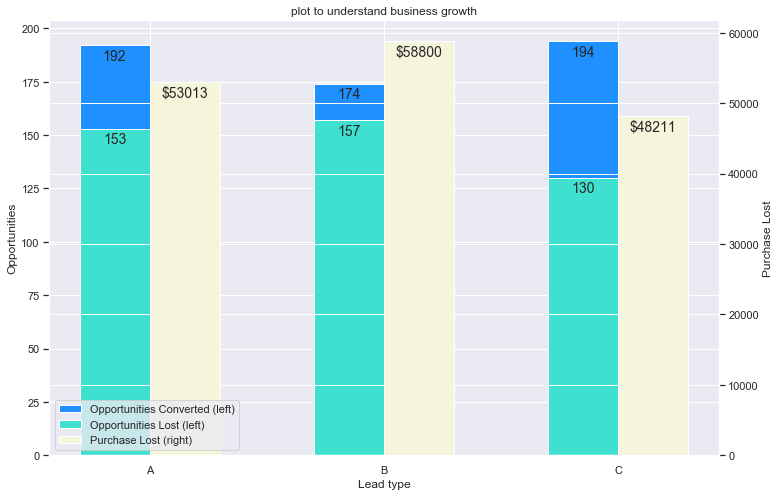

In [219]:
'''
This bar graph gives us the number of opportunities converted, number of opportunities lost and total purchase lost due to opportunities which are lost
'''

fig = plt.figure(figsize=(12, 8))
x = np.arange(3)
ax1 = plt.subplot(1,1,1)
w = 0.3
ax1.set_xlabel('Lead type')
ax1.set_ylabel('Opportunities')
ax1.set_title('plot to understand business growth')
plt.xticks(x + w /2, df['index'], rotation='horizontal')
op_con =ax1.bar(x, df['opportunities_converted'], width=w, color='dodgerblue', align='center')
op_lst = ax1.bar(x, df['opportunities_lost'], width=w, color='turquoise', align='center')


ax2 = ax1.twinx()
ax2.set_ylabel('lost purchase')
pur_lst = ax2.bar(x + w, df['purchase_lost'], width=w,color='beige',align='center')
plt.ylabel('Purchase Lost')
plt.legend([op_con, op_lst, pur_lst],['Opportunities Converted (left)', 'Opportunities Lost (left)', 'Purchase Lost (right)'],loc='lower left')
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, 
            y+height-5, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',size=14)
    
for p2 in ax2.patches:
    width, height = p2.get_width(), p2.get_height()
    x, y = p2.get_xy() 
    ax2.text(x+width/2, 
            y+height-1500, 
            '${:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',size=14)